# Basic Model to use on CIFAR 10 dataset

In [1]:
# import libraries

import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [2]:


data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)



['train', 'test']
['deer', 'cat', 'ship', 'airplane', 'frog', 'bird', 'horse', 'dog', 'truck', 'automobile']


In [3]:
airplane_files = os.listdir(data_dir + '/train/airplane')
print('No. of training examples for airplanes:', len(airplane_files))
print(airplane_files[:5])

ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of test examples for ship:", len(ship_test_files))
print(ship_test_files[:5])


No. of training examples for airplanes: 5000
['4008.png', '3534.png', '0912.png', '0680.png', '3434.png']
No. of test examples for ship: 1000
['0912.png', '0680.png', '0235.png', '0668.png', '0091.png']


In [4]:
# 'ImageFolder' class from 'torchvision' can be used to load the data as PyTorch tensors

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [5]:
dataset = ImageFolder(data_dir + '/train', transform=ToTensor())

In [6]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [7]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [8]:
#matplot lib to show the pictures

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [9]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], '('+str(label)+')')
    plt.imshow(img.permute(1,2,0))

Label:  airplane (0)


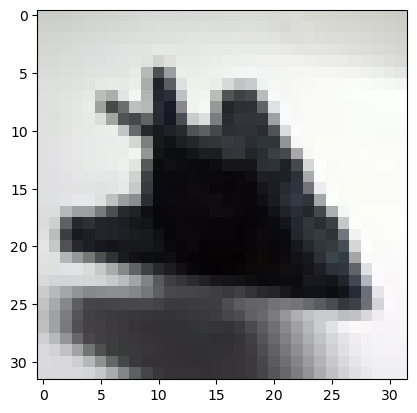

In [10]:
show_example(*dataset[0]) 

Label:  airplane (0)


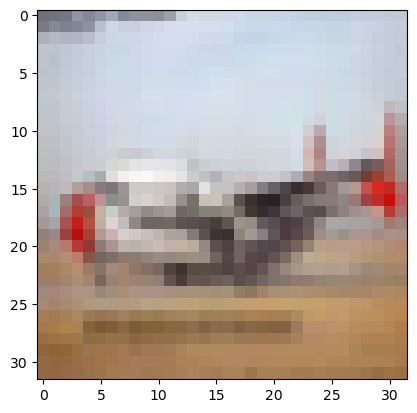

In [11]:
show_example(*dataset[1099])

In [12]:
# Training and validation dataset

torch.manual_seed(1729)

In [13]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [14]:
# dataloaders

train_dl = torch.utils.data.DataLoader(dataset=train_ds, batch_size=128, shuffle=True)
val_dl = torch.utils.data.DataLoader(dataset=val_ds, batch_size=128*2, shuffle=False)

In [15]:
# make grids to show pictures

from torchvision.utils import make_grid

def show_batch(d1):
    for images, labels in d1:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

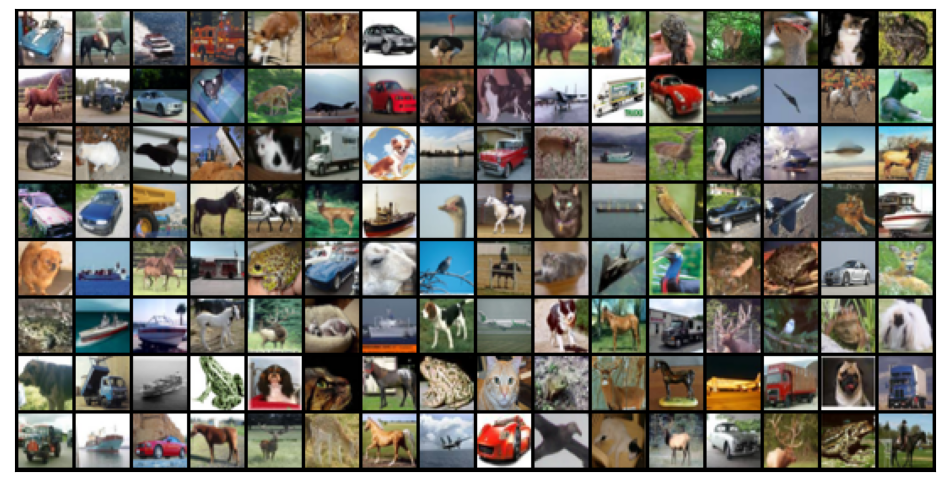

In [16]:
show_batch(train_dl)

In [17]:
# First attempt for basic Net model

# Define the class Net

import torch.nn as nn

class Net(nn.Module):
    #constructor
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc1 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))   # [10, 6, 28, 28]
        x = self.pool(x)                        # [10, 6, 14, 14]
        x = nn.functional.relu(self.conv2(x))   # [10, 16 10, 10]
        x = self.pool(x)                        # [10, 16, 5, 5]
        
        x = torch.flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [18]:
model = Net()

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [20]:
# Train hte model

LOSS= []

def train_model(epochs):
    for epoch in range(epochs):
        if epoch % 5 == 0:
            pass
            plot_data(data_set, model)

SyntaxError: unexpected EOF while parsing (1346165199.py, line 7)

In [ ]:
# Train hte model

epochs = 20

for epoch in range(epochs):
    
    running_loss = 0.0
    for i, data in enumerate(train_dl, 0):
        # get the inputs, data is a list of [inputs, labels]
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
        